# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import the pandas package needed for loading the csv file into a dataframe
import pandas as pd

# load the file
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [2]:
# Checking the dataframe
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# import the requests library
import requests

# store the link in a variable
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Get the file
response = requests.get(url)

# Store the file
with open("img_pred.tsv", "wb") as file:
    file.write(response.content)

# load the stored file to a dataframe
img_pred = pd.read_csv("img_data.tsv", sep = "\t")

In [4]:
# Checking the img_pred dataframe
img_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# import the zipfile library to unzip the tweet-json.zip file
import zipfile

# unzip the file
with zipfile.ZipFile("tweet-json.zip", "r") as f:
    f.extractall()    

# import the json library to load from txt file to json
import json

tweets_json = [json.loads(line) for line in open("tweet-json copy", "r")]
tweets_list = []
for tweet_info in tweets_json:
    tweet_id = tweet_info["id"]
    favourite_count = tweet_info["favorite_count"]
    retweet_count = tweet_info["retweet_count"]
    
    tweets_list.append({
        "tweet_id" : tweet_id,
        "favourite_count" : favourite_count,
        "retweet_count" : retweet_count
    })
    
# Creating the dataframe from the list of tweets info gotten from the json file
tweets_added_info = pd.DataFrame(tweets_list, columns = ["tweet_id", "favourite_count", "retweet_count"])

In [6]:
# Checking the tweets_added_info dataframe
tweets_added_info.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### twitter_archive data

*Visual Assessment*

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


*Programmatic Assessment*

In [8]:
# Checking for the dataframe info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Checking for duplicates
twitter_archive.duplicated().sum()

0

In [10]:
# Checking if the rating_denominator has only a unique value of 10
twitter_archive["rating_denominator"].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [11]:
# Checking the dataframe where the rating_denominator is not 10
twitter_archive[twitter_archive["rating_denominator"] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
# Checking the name column for any abnormality
twitter_archive["name"].value_counts().head(40)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Phil         5
Sammy        5
Gus          5
Chester      5
Alfie        5
Sunny        5
Bentley      5
very         5
Oakley       5
Finn         5
Name: name, dtype: int64

In [13]:
# Checking the dataframe for name entries with 'a'
twitter_archive[twitter_archive["name"] == "a"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [14]:
# Checking the dataframe for name entries with 'an'
twitter_archive[twitter_archive["name"] == "an"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [15]:
# Checking the dataframe for name entries with 'the'
twitter_archive[twitter_archive["name"] == "the"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [16]:
# Checking the dataframe for name entries with 'very'
twitter_archive[twitter_archive["name"] == "very"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None


In [17]:
# Checking that the columns with retweet info have the same rows of 'nulls' and 'notnulls'
df_retweet_nan = twitter_archive[twitter_archive["retweeted_status_id"].isna()]
print(df_retweet_nan.retweeted_status_id.unique())
print(df_retweet_nan.retweeted_status_timestamp.unique())

[nan]
[nan]


### img_pred data

*Visual Assessment*

In [18]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


*Programmatic Assessment*

In [19]:
#Checking the dataframe's info
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Checking for duplicates
img_pred.duplicated().sum()

0

In [21]:
# Checking for random sample rows in the img_pred dataframe
img_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic_book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,Ibizan_hound,0.044602,True,Italian_greyhound,0.018611,True
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
303,671511350426865664,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,hermit_crab,0.625409,False,tick,0.127333,False,snail,0.097916,False
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False


In [22]:
# Checking if the img_num entries are as expected (1-4)
img_pred["img_num"].unique()

array([1, 4, 2, 3], dtype=int64)

In [23]:
# Checking to see that the prediction1 confidence is not below 0
img_pred["p1_conf"].min()

0.0443334

In [24]:
# Checking to see that the prediction1 confidence is not above 1
img_pred["p1_conf"].max()

1.0

In [25]:
# Checking to see that the prediction2 confidence is not below 0
img_pred["p2_conf"].min()

1.0113000000000001e-08

In [26]:
# Checking to see that the prediction2 confidence is not above 1
img_pred["p2_conf"].max()

0.488014

In [27]:
# Checking to see that the prediction3 confidence is not below 0
img_pred["p3_conf"].min()

1.7401699999999998e-10

In [28]:
# Checking to see that the prediction3 confidence is not above 1
img_pred["p3_conf"].max()

0.273419

In [29]:
# Checking to see if there are any abnormalities in the predition1 naming
img_pred["p1"].value_counts().head(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Name: p1, dtype: int64

In [30]:
# Checking the rows in the dataframe with "website" and "Cardigan" entries in prediction1
img_pred[(img_pred["p1"] == "web_site")|(img_pred["p1"] == "Cardigan")]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan,0.984725,True,Pembroke,0.008730,True,kelpie,0.002195,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True


In [31]:
# Checking to see if there are any abnormalities in the predition2 naming
img_pred["p2"].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
# Checking the rows in the dataframe with "medicine_chest" entry in prediction2
img_pred[img_pred["p2"] == "medicine_chest"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False


In [33]:
# Checking the rows in the dataframe with "Cardigan" entries in prediction3
img_pred["p3"].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [34]:
# Checking the rows in the dataframe with "pot" or "banana" entry in prediction3
img_pred[(img_pred["p3"] == "pot") | (img_pred["p3"] == "banana")]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
# Checkin for duplicate image entries
img_pred[(img_pred['jpg_url'].duplicated()) & (img_pred['img_num'].duplicated())]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


### tweets_added_info

*Visual Assessment*

In [36]:
tweets_added_info

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


*Programmatic Assessment*

In [37]:
tweets_added_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favourite_count  2354 non-null   int64
 2   retweet_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [38]:
# Checking random row samples
tweets_added_info.sample(5)

,tweet_id,favourite_count,retweet_count
28,886366144734445568,21524,3316
2104,670468609693655041,375,90
1944,673705679337693185,1337,439
1630,684460069371654144,2169,628
60,880221127280381952,27640,4436


In [39]:
# Checking to see that there is no favourite count below 0 
tweets_added_info["favourite_count"].min()

0

In [40]:
# Checking to see that there is no retweet count below 0
tweets_added_info["retweet_count"].min()

0

### Quality issues

*twitter_archive data*
1. Missing data in the expanded url column

2. timestamp `object` datatype instead of `datetime`

3. Not-Null entries in columns with retweets info (retweets in the text data)

4. Invalid names ('a', 'an', 'the', 'very')

*img_pred data*

1. Inconsistences between the three predictions entries naming (lower case and capitalized) 

2. `66` duplicated image links used for prediction

3. `19` entries each for `website` and `Cardigan` as predictions in `p1` column

4. `1` entry for `medicine_chest` as predictions in `p2` column

5. `1` entry each for `pot` and `banana` as predictions in `p3` column

6. Non-descriptive name for the prediction columns (`p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, `p3_dog`)


### Tidiness issues
1. Four(doggo, floofer, pupper, puppo) stages columns instead of one in the twitter archive data 

2. timestamp column should be splited into year, month, day and time

3. Irrelevant columns

4. Seperate tables of data

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data
archive_copy = twitter_archive.copy()
img_pred_copy = img_pred.copy()
added_info_copy = tweets_added_info.copy()

### Issue #1:
**Quality**

_Missing data in the expanded url column_

#### Define
_Twitter_archive data_
- Get all the expanded_urls for the tweets in the data by concatenating `https://twitter.com/dog_rates/status/` with the `tweet_id`

#### Code

In [42]:
merge_url = "https://twitter.com/dog_rates/status/"
archive_copy["expanded_urls"] = merge_url + archive_copy["tweet_id"].apply(str)

#### Test

In [239]:
archive_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,time
936,753375668877008896,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,2016,7,13,23:48:51
1587,686749460672679938,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,2016,1,12,03:20:05
906,768909767477751808,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/768909767...,10,10,None,pupper,2016,8,25,20:35:48


In [44]:
archive_copy["expanded_urls"].isna().sum()

0

### Issue #2: 
**Tideness**

_Four(doggo, floofer, pupper, puppo) stages columns instead of one in the twitter archive data_

#### Define:  
*twitter_archive data*
 - Seperate the archive_copy into two dataframes 
     - The first dataframe should contain rows with only `none` entries in the four stages columns
     - The second dataframe should contains data left after removing rows with only `none` entries in the four stages columns
 - Drop the four stages columns in the first dataframe
 - Create a new column in the first dataframe called dog_stage and assign `None` to it.
 - Melt the doggo, floofer, pupper and puppo columns into a dog_stage column in the second dataframe
 - Remove rows that contain `None`
 - Drop the value column produce from the `melt`

#### Code

In [45]:
bool_index = ((archive_copy["doggo"] == "None") & 
          (archive_copy["floofer"] == "None") & 
          (archive_copy["pupper"] == "None") & 
          (archive_copy["puppo"] == "None"))
arc1 = archive_copy[bool_index]

In [46]:
arc2 = archive_copy[bool_index == False]

In [47]:
arc1 = arc1.drop(["doggo", "floofer", "pupper","puppo"], axis = 1)
arc1["dog_stage"] = "None"

In [48]:
id_vars = arc2.columns.drop(["doggo", "floofer", "pupper", "puppo"])
arc2 = pd.melt(arc2, id_vars = id_vars, var_name = "dog_stage")
arc2 = arc2[arc2["value"] != "None"]
arc2 = arc2.drop(["value"], axis=1)

In [49]:
arc2 = arc2[arc2.tweet_id.duplicated() == False]

In [50]:
archive_copy = pd.concat([arc1, arc2])

#### Test

In [51]:
archive_copy.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
202,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10,10,Derek,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,13,10,Tuck,None
1557,688804835492233216,NaN,NaN,2016-01-17 19:27:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688804835...,12,10,None,None
1331,705591895322394625,NaN,NaN,2016-03-04 03:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ma'am, for the last time, I'm not authorized ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705591895...,11,10,None,None
1125,673363615379013632,NaN,NaN,2015-12-06 04:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper can't wait for Christmas. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615...,11,10,None,pupper
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None
1131,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,pupper
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832645525...,10,10,not,None
1276,709158332880297985,NaN,NaN,2016-03-13 23:24:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rodney. He's a Ukranian Boomchicka. Outsi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709158332...,10,10,Rodney,None


In [52]:
archive_copy["dog_stage"].value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [53]:
archive_copy.shape

(2356, 14)

### Issue #3: 
**Tideness**

_timestamp column should be splited into year, month, day and time_

#### Define:  
*twitter_archive data*
- Convert the timestamp column datatype from `object` to `datetime`
- Create a `year` column in the dataframe extracted from the timestamp column
- Create a `month` column in the dataframe extracted from the timestamp column
- Create a `day` column in the dataframe extracted from the timestamp column
- Create a `time` column in the dataframe extracted from the timestamp column
- Delete the `timestamp` column

#### Code

In [54]:
archive_copy["timestamp"] = pd.to_datetime(archive_copy["timestamp"])
archive_copy["year"] = archive_copy["timestamp"].dt.year
archive_copy["month"] = archive_copy["timestamp"].dt.month
archive_copy["day"] = archive_copy["timestamp"].dt.day
archive_copy["time"] = archive_copy["timestamp"].dt.time
archive_copy.drop(["timestamp"], axis = 1, inplace=True)

#### Test

In [55]:
archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,2017,8,1,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,2017,8,1,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,2017,7,31,00:18:03


In [56]:
archive_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,time
1122,673697980713705472,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,pupper,2015,12,7,02:58:09
458,817908911860748288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Looks like he went cross-eyed trying way too h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817908911...,12,10,None,None,2017,1,8,01:40:55
1442,696754882863349760,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Reptar. He specifically asked for his ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696754882...,10,10,Reptar,None,2016,2,8,17:58:03


### Issue #4: 
**Tidiness**

_Irrelevant columns and seperate tables of data_

#### Define:  
- Remove irrelevant rows and merge the tables`

#### Code

In [57]:
archive_cols_valid = archive_copy.columns.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                                     "source"])
archive_clean = archive_copy[archive_cols_valid]
tweet_cleaned = pd.merge(archive_clean, img_pred_copy, on = ["tweet_id"])
tweet_cleaned = pd.merge(tweet_cleaned, added_info_copy, on = ["tweet_id"])

#### Test

In [58]:
tweet_cleaned

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,752519690950500352,Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,...,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True,8157,3917
2069,751132876104687617,This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,...,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,5610,1480
2070,744995568523612160,This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,...,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,3277,716
2071,743253157753532416,This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,...,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624,1366


In [59]:
tweet_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   text                        2073 non-null   object 
 2   retweeted_status_id         79 non-null     float64
 3   retweeted_status_user_id    79 non-null     float64
 4   retweeted_status_timestamp  79 non-null     object 
 5   expanded_urls               2073 non-null   object 
 6   rating_numerator            2073 non-null   int64  
 7   rating_denominator          2073 non-null   int64  
 8   name                        2073 non-null   object 
 9   dog_stage                   2073 non-null   object 
 10  year                        2073 non-null   int64  
 11  month                       2073 non-null   int64  
 12  day                         2073 non-null   int64  
 13  time                        2073 

### Issue #5: 
**Quality**

_Not-Null entries in columns with retweets info (retweets in the text data)_

#### Define:  

- Remove rows with not-null entries in any of this columns; `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

#### Code

In [60]:
tweet_cleaned = tweet_cleaned[tweet_cleaned.retweeted_status_id.isnull()]

#### Test

In [61]:
tweet_cleaned

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,752519690950500352,Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,...,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True,8157,3917
2069,751132876104687617,This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,...,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,5610,1480
2070,744995568523612160,This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,...,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,3277,716
2071,743253157753532416,This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,...,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624,1366


### Issue #6: 
**Quality**

_Invalid names ('a', 'an', 'the', 'very')_

#### Define:  
- Replace all entries of `a`, `an`, `the` and `very` with `None`

#### Code

In [62]:
bool_index_2 = ((tweet_cleaned["name"] == 'a') | 
              (tweet_cleaned["name"] == 'an') | 
              (tweet_cleaned["name"] == 'the') |
             (tweet_cleaned["name"] == 'very'))
tweet_cleaned.loc[bool_index_2, 'name'] = 'None'

#### Test

In [63]:
tweet_cleaned['name'].value_counts().head(40)

None        618
Charlie      11
Lucy         10
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Toby          7
Daisy         7
Lola          7
Bo            6
Jax           6
Bella         6
Koda          6
Stanley       6
Scout         5
Chester       5
Dave          5
Rusty         5
Buddy         5
Louis         5
Bailey        5
Oscar         5
Milo          5
Leo           5
Finn          4
Oakley        4
Phil          4
Clarence      4
Duke          4
Jerry         4
Maggie        4
Larry         4
Brody         4
Bentley       4
George        4
Winnie        4
Sophie        4
Name: name, dtype: int64

### Issue #7: 
**Quality**

_Inconsistences between the three predictions entries naming (lower case and capitalized)_

#### Define:  
- All entries for `p1`, `p2`, and `p3` will be converted to lower case

#### Code

In [64]:
tweet_cleaned["p1"] = tweet_cleaned["p1"].str.lower()
tweet_cleaned["p2"] = tweet_cleaned["p2"].str.lower()
tweet_cleaned["p3"] = tweet_cleaned["p3"].str.lower()

C:\Users\Trainer\AppData\Local\Temp\ipykernel_4824\2664526827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_cleaned["p1"] = tweet_cleaned["p1"].str.lower()
C:\Users\Trainer\AppData\Local\Temp\ipykernel_4824\2664526827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_cleaned["p2"] = tweet_cleaned["p2"].str.lower()
C:\Users\Trainer\AppData\Local\Temp\ipykernel_4824\2664526827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

#### Test

In [65]:
tweet_cleaned["p1"].value_counts().head(15)

golden_retriever            139
labrador_retriever           95
pembroke                     88
chihuahua                    79
pug                          54
chow                         41
samoyed                      40
toy_poodle                   38
pomeranian                   38
malamute                     29
cocker_spaniel               27
french_bulldog               26
chesapeake_bay_retriever     23
miniature_pinscher           22
seat_belt                    21
Name: p1, dtype: int64

In [66]:
tweet_cleaned["p2"].value_counts().head(15)

labrador_retriever          96
golden_retriever            82
cardigan                    73
chihuahua                   43
chesapeake_bay_retriever    40
pomeranian                  39
french_bulldog              39
toy_poodle                  36
siberian_husky              33
cocker_spaniel              32
miniature_poodle            32
beagle                      28
eskimo_dog                  27
collie                      26
pembroke                    25
Name: p2, dtype: int64

In [67]:
tweet_cleaned["p3"].value_counts().head(15)

labrador_retriever           76
chihuahua                    57
golden_retriever             46
eskimo_dog                   36
kelpie                       33
kuvasz                       31
chow                         31
staffordshire_bullterrier    30
beagle                       30
cocker_spaniel               29
toy_poodle                   29
pekinese                     28
pomeranian                   27
pembroke                     26
great_pyrenees               26
Name: p3, dtype: int64

### Issue #8: 
**Quality**

_66 duplicated image links used for prediction_

#### Define

- Remove the 66 duplicated rows  

#### Code

In [68]:
tweet_cleaned[(tweet_cleaned['jpg_url'].duplicated()) & (tweet_cleaned['img_num'].duplicated())]

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourite_count,retweet_count


#### Test

In [240]:
tweet_cleaned.shape

(1976, 20)

The duplicates were removed when I merged the three tables on only tweet_ids that were common in all three tables

### Issue #9: 
**Quality**

_`19` entries each for `website` and `Cardigan` as predictions in `p1` column_

#### Define

- Remove the 19 entries each for website and Cardigan as predictions in p1 column

#### Code

In [70]:
tweet_cleaned[(tweet_cleaned["p1"] == "web_site")|(tweet_cleaned["p1"] == "Cardigan")]

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourite_count,retweet_count
40,882045870035918850,"This is Koko. Her owner, inspired by Barney, r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/882045870...,13,10,Koko,None,...,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True,29900,5203
147,851464819735769094,This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,...,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False,25944,7855
190,840696689258311684,I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,...,0.841768,False,rule,0.007087,False,envelope,0.006820,False,13377,1116
307,816450570814898180,Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,...,0.352857,False,envelope,0.060107,False,nail,0.031291,False,33961,9366
367,804026241225523202,This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,...,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False,49774,18876
429,792913359805018113,Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,None,None,...,0.226716,False,lighter,0.081941,False,switch,0.039009,False,16063,4715
517,776088319444877312,I can't tap the screen to make the hearts appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776088319...,10,10,None,None,...,0.999916,False,pug,0.000077,True,menu,0.000002,False,2045,179
519,775729183532220416,This girl straight up rejected a guy because h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775729183...,13,10,None,None,...,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False,14361,5302
1482,670822709593571328,Can't do better than this lol. 10/10 for the o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670822709...,10,10,None,None,...,0.993887,False,chihuahua,0.001252,True,menu,0.000599,False,647,105
1539,670040295598354432,😂😂😂 10/10 for the dog and the owner https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670040295...,10,10,None,None,...,0.901552,False,borzoi,0.026660,True,chihuahua,0.012438,True,801,118


In [71]:
# Droping the remaining 15 rows that are still there after the merge
tweet_cleaned = tweet_cleaned[((tweet_cleaned["p1"] == "web_site")|(tweet_cleaned["p1"] == "Cardigan"))
                             == False]

#### Test

In [72]:
tweet_cleaned[(tweet_cleaned["p1"] == "web_site")|(tweet_cleaned["p1"] == "Cardigan")]

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourite_count,retweet_count


In [73]:
tweet_cleaned.shape

(1979, 27)

### Issue #10: 
**Quality**

_`1` entry for `medicine_chest` as predictions in `p2` column_

#### Define:

- Remove the 1 entry for medicine_chest as predictions in p2 column

#### Code

In [74]:
# Checking to see if the issue is still there after the merge
tweet_cleaned[tweet_cleaned["p2"] == "medicine_chest"]

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourite_count,retweet_count
1101,686947101016735744,This is Jackson. He was specifically told not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686947101...,11,10,Jackson,None,...,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False,9433,3582


In [75]:
tweet_cleaned = tweet_cleaned[tweet_cleaned["p2"] != "medicine_chest"]

#### Test

In [76]:
"medicine_chest" in tweet_cleaned["p1"].unique()

False

In [77]:
'chihuahua' in tweet_cleaned["p1"].unique()

True

### Issue #11: 
**Quality**

_`1` entry each for `pot` and `banana` as predictions in `p3` column_

    #### Define:

    - Remove each entry of `pot` and `banana` in p3 column

#### Code

In [78]:
# Checking to see if the issue is still there after the merge
tweet_cleaned = tweet_cleaned[tweet_cleaned["p3"] != "pot"]
tweet_cleaned = tweet_cleaned[tweet_cleaned["p3"] != "banana"]

#### Test

In [79]:
"pot" in tweet_cleaned["p3"].unique()

False

In [80]:
"banana" in tweet_cleaned["p3"].unique()

False

### Issue #12: 
**Quality**

_Non-descriptive name for the prediction columns (`p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, `p3_dog`)_

#### Define:

- Rename the columns; `p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, `p3_dog` to be more descriptive

#### Code

In [81]:
map_ = {"p1" : "prediction1", 
        "p2" : "prediction2", 
        "p3" : "prediction3", 
        "p1_conf" : "prediction1_confidence", 
        "p2_conf" : "prediction2_confidence", 
        "p3_conf" : "prediction3_confidence", 
        "p1_dog" : "prediction1_dog", 
        "p2_dog" : "prediction2_dog", 
        "p3_dog" : "prediction3_dog"}
tweet_cleaned.rename(map_, axis=1, inplace=True)

#### Test

In [82]:
tweet_cleaned.sample()

,tweet_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favourite_count,retweet_count
1727,666362758909284353,Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,...,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,804,595


### Issue #13:

_Drop columns that are not needed anymore_

#### Define:

- Remove the `text`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns

#### Code

In [83]:
drop_cols = ["text", "retweeted_status_id", "retweeted_status_user_id",
             "retweeted_status_timestamp", "time", "jpg_url", "img_num"]
tweet_cleaned.drop(drop_cols, axis = 1, inplace=True) 

#### Test

In [84]:
tweet_cleaned.sample()

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favourite_count,retweet_count
1681,667200525029539841,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,2015,11,19,siberian_husky,0.694904,True,malamute,0.232006,True,eskimo_dog,0.050635,True,658,282


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
# Storing the cleaned file in csv format
tweet_cleaned.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [139]:
# Top three common names of dogs in WeRateDogs data
tweet_cleaned["name"].str.lower().value_counts().head(3)

none       607
charlie     11
oliver      10
Name: name, dtype: int64

In [140]:
# Most common dog stage
tweet_cleaned["dog_stage"].value_counts()

None       1675
pupper      199
doggo        73
puppo        22
floofer       7
Name: dog_stage, dtype: int64

In [126]:
# Checking to see how many images did not have dog as its prediction in the three predictions.
tweet_cleaned[(tweet_cleaned['prediction1_dog'] == False) &
          (tweet_cleaned['prediction2_dog'] == False) & 
          (tweet_cleaned['prediction3_dog'] == False)]

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favourite_count,retweet_count
18,887517139158093824,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,2017,7,19,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,46959,12082
24,886680336477933568,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,2017,7,16,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,22798,4610
43,881268444196462592,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,None,2017,7,1,tusker,0.473303,False,indian_elephant,0.245646,False,ibex,0.055661,False,23501,5358
44,880935762899988482,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,2017,6,30,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False,17346,2886
53,879050749262655488,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,2017,6,25,tabby,0.311861,False,window_screen,0.169123,False,egyptian_cat,0.132932,False,23022,4941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,673148804208660480,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,pupper,2015,12,5,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False,1822,688
2041,672970152493887488,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,pupper,2015,12,5,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False,1019,391
2042,672898206762672129,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,pupper,2015,12,4,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False,944,459
2044,672614745925664768,https://twitter.com/dog_rates/status/672614745...,6,10,Norman,pupper,2015,12,4,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False,1302,644


In [128]:
# Top ten predictions in prediction1
tweet_cleaned["prediction1"].value_counts().head(10)

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy_poodle             38
pomeranian             38
malamute               29
Name: prediction1, dtype: int64

In [130]:
# Top ten predictions in prediction2
tweet_cleaned["prediction2"].value_counts().head(10)

labrador_retriever          95
golden_retriever            82
cardigan                    73
chihuahua                   42
chesapeake_bay_retriever    40
pomeranian                  39
french_bulldog              39
toy_poodle                  36
siberian_husky              33
miniature_poodle            32
Name: prediction2, dtype: int64

In [131]:
# Top ten predictions in prediction3
tweet_cleaned["prediction3"].value_counts().head(10)

labrador_retriever           76
chihuahua                    56
golden_retriever             44
eskimo_dog                   36
kelpie                       33
chow                         31
kuvasz                       31
beagle                       30
staffordshire_bullterrier    30
cocker_spaniel               29
Name: prediction3, dtype: int64

In [133]:
# Checking to see the images that had at least one prediction of being a dog
has_dog = tweet_cleaned[(tweet_cleaned["prediction1_dog"] == True) | 
                        (tweet_cleaned["prediction2_dog"] == True) | 
                        (tweet_cleaned["prediction3_dog"] == True)]
has_dog

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favourite_count,retweet_count
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,2017,8,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,2017,7,31,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,2017,7,30,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,2017,7,29,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774
5,891087950875897856,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,2017,7,29,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,20562,3261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,752519690950500352,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,2016,7,11,swing,0.999984,False,labrador_retriever,0.000010,True,eskimo_dog,0.000001,True,8157,3917
2069,751132876104687617,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,2016,7,7,labrador_retriever,0.929390,True,chesapeake_bay_retriever,0.038254,True,golden_retriever,0.007610,True,5610,1480
2070,744995568523612160,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,2016,6,20,old_english_sheepdog,0.427481,True,shih-tzu,0.146336,True,tibetan_terrier,0.134269,True,3277,716
2071,743253157753532416,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,2016,6,16,malamute,0.442612,True,siberian_husky,0.368137,True,eskimo_dog,0.177822,True,4624,1366


In [135]:
# Checking to see dogs that were predicted with high confidence in prediction1
pred1_high = tweet_cleaned[(tweet_cleaned["prediction1_confidence"] >= 0.9) & 
              (tweet_cleaned["prediction1_dog"] == True)]
pred1_high

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favourite_count,retweet_count
9,890006608113172480,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,2017,7,26,samoyed,0.957979,True,pomeranian,0.013884,True,chow,0.008167,True,31166,7624
11,889638837579907072,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,2017,7,25,french_bulldog,0.991650,True,boxer,0.002129,True,staffordshire_bullterrier,0.001498,True,27672,4735
16,888078434458587136,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,2017,7,20,french_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,22201,3653
25,886258384151887873,https://twitter.com/dog_rates/status/886258384...,13,10,Waffles,None,2017,7,15,pug,0.943575,True,shower_cap,0.025286,False,siamese_cat,0.002849,False,28469,6523
26,885984800019947520,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,2017,7,14,blenheim_spaniel,0.972494,True,shih-tzu,0.006630,True,bernese_mountain_dog,0.006239,True,33382,7097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,889665388333682689,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,2017,7,25,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True,38818,8538
2051,889531135344209921,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,2017,7,24,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,0.007958,True,15359,2321
2059,819952236453363712,https://twitter.com/dog_rates/status/819952236...,13,10,Oliver,puppo,2017,1,13,american_staffordshire_terrier,0.925505,True,staffordshire_bullterrier,0.036221,True,italian_greyhound,0.020412,True,5927,1369
2065,787717603741622272,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,puppo,2016,10,16,german_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True,11416,3240


In [137]:
# Checking to see the top five dogs with high prediction in prediction1 column
pred1_high["prediction1"].value_counts().head(5)

golden_retriever      36
pembroke              26
pug                   24
samoyed               21
labrador_retriever    17
Name: prediction1, dtype: int64

In [94]:
# Creating a new dataframe from the previously cleaned dataframe for a denominator scale of ten
tweet_new = tweet_cleaned[tweet_cleaned["rating_denominator"] == 10]

In [95]:
# Testing to see the denominator rating only includes ten
tweet_new["rating_denominator"].unique()

array([10], dtype=int64)

In [143]:
# Proportion of each rating_numerator
tweet_new["rating_numerator"].value_counts(normalize = True)

12      0.229826
10      0.211440
11      0.201226
13      0.130235
9       0.076609
8       0.048519
7       0.025536
5       0.016854
6       0.016343
14      0.015832
3       0.009704
4       0.007661
2       0.004597
1       0.002043
0       0.001021
75      0.000511
1776    0.000511
26      0.000511
420     0.000511
27      0.000511
Name: rating_numerator, dtype: float64

In [229]:
top_5_numerators = tweet_new["rating_numerator"].value_counts().head()
top_5_numerators

12    450
10    414
11    394
13    255
9     150
Name: rating_numerator, dtype: int64

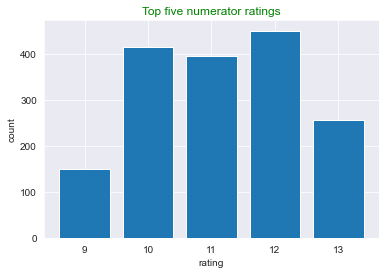

In [238]:
plt.bar(top_5_numerators.index, top_5_numerators.values)
plt.title("Top five numerator ratings", color = 'g')
plt.xlabel("rating")
plt.ylabel("count");

In [103]:
# importing matplotlib and seaborn for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [141]:
# Doing a univariate analysis on the rating_numerator column to see which value occurred the most

In [191]:
# creating a monthly group of "favourite_count" sum and "retweet_count" sum
tweet_mnth_sum = tweet_cleaned.groupby('month')[["favourite_count", "retweet_count"]].sum()
tweet_mnth_sum

,favourite_count,retweet_count
month,,
1,1893134,648881
2,1672341,460559
3,1520247,427479
4,1164802,315097
5,1572257,441832
6,2034738,614500
7,2124453,543671
8,641958,223154
9,704029,226818


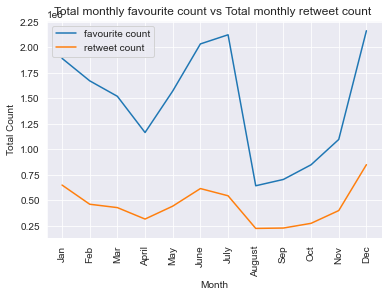

In [219]:
plt.plot(tweet_mnth_sum.index, tweet_mnth_sum["favourite_count"], label = "favourite count")
plt.plot(tweet_mnth_sum.index, tweet_mnth_sum["retweet_count"], label = "retweet count")
plt.title("Total monthly favourite count vs Total monthly retweet count ")
plt.xlabel("Month")
plt.ylabel("Total Count")
ticks = np.arange(1, 13)
lab = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "August", "Sep", 
       "Oct", "Nov", "Dec"]
plt.xticks(ticks, lab, rotation = 90)
plt.legend();

In [192]:
tweet_mnth_max = tweet_cleaned.groupby('month')[["favourite_count", "retweet_count"]].max()
tweet_mnth_max

,favourite_count,retweet_count
month,,
1,132810,48265
2,73397,19297
3,48410,20500
4,47844,19196
5,106827,32883
6,131075,79515
7,69871,18781
8,55016,33421
9,33345,18497


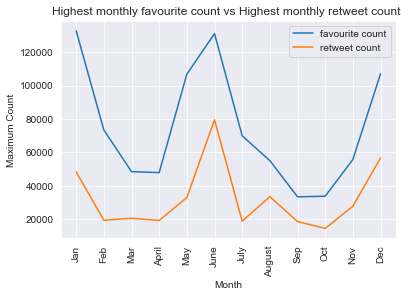

In [220]:
plt.plot(tweet_mnth_max.index, tweet_mnth_max["favourite_count"], label = "favourite count")
plt.plot(tweet_mnth_max.index, tweet_mnth_max["retweet_count"], label = "retweet count")
plt.title("Highest monthly favourite count vs Highest monthly retweet count ")
plt.xlabel("Month")
plt.ylabel("Maximum Count")
ticks = np.arange(1, 13)
lab = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "August", "Sep", 
       "Oct", "Nov", "Dec"]
plt.xticks(ticks, lab, rotation = 90)
plt.legend();

### Insights:
1.

2.

3.

### Visualization